In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Load data
df = pd.read_csv('traffic_volume_data.csv')

In [3]:
df.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,...,last_2_hour_traffic,last_3_hour_traffic,last_4_hour_traffic,last_5_hour_traffic,last_6_hour_traffic,hour,month_day,weekday,month,year
0,2012-10-02 21:00:00,1,128,61,4,325,4,4,288.61,0.0,...,3539.0,4770.0,5791.0,6015.0,5584.0,21,2,2,10,2012
1,2012-10-02 22:00:00,1,18,61,4,325,7,7,287.16,0.0,...,2784.0,3539.0,4770.0,5791.0,6015.0,22,2,2,10,2012
2,2012-10-02 23:00:00,1,186,60,4,324,5,5,285.45,0.0,...,2361.0,2784.0,3539.0,4770.0,5791.0,23,2,2,10,2012
3,2012-10-03 00:00:00,1,58,60,4,324,2,2,284.63,0.0,...,1529.0,2361.0,2784.0,3539.0,4770.0,0,3,3,10,2012
4,2012-10-03 01:00:00,1,158,59,4,324,6,6,283.47,0.0,...,963.0,1529.0,2361.0,2784.0,3539.0,1,3,3,10,2012


In [32]:
df.shape

(33738, 26)

In [33]:
# Convert date_time to datetime
df['date_time'] = pd.to_datetime(df['date_time'])

In [5]:
# Extract additional time features
df['hour'] = df['date_time'].dt.hour
df['month_day'] = df['date_time'].dt.day
df['weekday'] = df['date_time'].dt.weekday
df['month'] = df['date_time'].dt.month
df['year'] = df['date_time'].dt.year


In [6]:
# Define features and target
features = ['is_holiday', 'temperature', 'weather_type', 'month_day', 'weekday', 'month', 'year']
target = 'traffic_volume'

X = df[features]
y = df[target]

In [7]:
X.head()

,is_holiday,temperature,weather_type,month_day,weekday,month,year
0,1,288.61,Clear,2,1,10,2012
1,1,287.16,Clear,2,1,10,2012
2,1,285.45,Clear,2,1,10,2012
3,1,284.63,Clear,3,2,10,2012
4,1,283.47,Clear,3,2,10,2012


In [8]:
y.head()

0    2361
1    1529
2     963
3     506
4     321
Name: traffic_volume, dtype: int64

In [9]:
X.shape

(33738, 7)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

[[<AxesSubplot:title={'center':'is_holiday'}>
  <AxesSubplot:title={'center':'temperature'}>]
 [<AxesSubplot:title={'center':'month_day'}>
  <AxesSubplot:title={'center':'weekday'}>]
 [<AxesSubplot:title={'center':'month'}>
  <AxesSubplot:title={'center':'year'}>]]


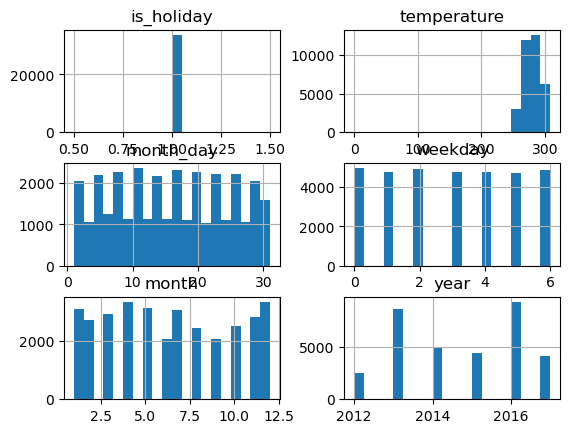

In [11]:
print(df[features].hist(bins=20,))

In [12]:
# Preprocessing pipelines
numeric_features = ['temperature']
categorical_features = ['is_holiday', 'weather_type', 'month_day', 'weekday', 'month', 'year']

In [13]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [14]:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])



In [15]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [16]:
import matplotlib.pyplot as plt

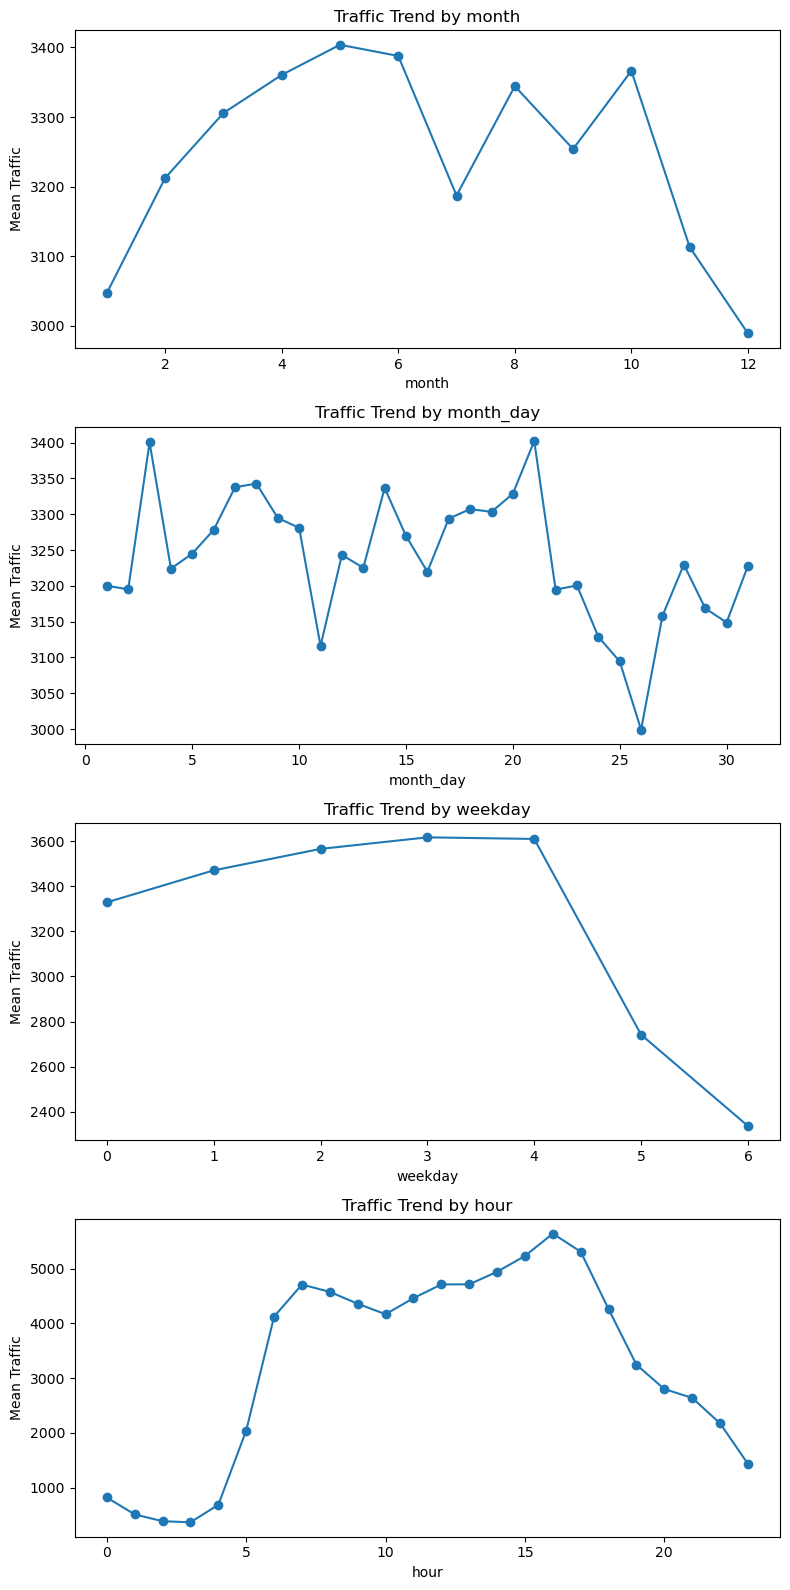

In [17]:
metrics = ['month', 'month_day', 'weekday', 'hour']
fig = plt.figure(figsize=(8, 4*len(metrics)))
for i, metric in enumerate(metrics):
	ax = fig.add_subplot(len(metrics), 1, i+1)
	ax.plot(df.groupby(metric)['traffic_volume'].mean(), '-o')
	ax.set_xlabel(metric)
	ax.set_ylabel("Mean Traffic")
	ax.set_title(f"Traffic Trend by {metric}")
plt.tight_layout()
plt.show()

In [18]:
print(features)

['is_holiday', 'temperature', 'weather_type', 'month_day', 'weekday', 'month', 'year']


In [19]:
df[features].head(5)

,is_holiday,temperature,weather_type,month_day,weekday,month,year
0,1,288.61,Clear,2,1,10,2012
1,1,287.16,Clear,2,1,10,2012
2,1,285.45,Clear,2,1,10,2012
3,1,284.63,Clear,3,2,10,2012
4,1,283.47,Clear,3,2,10,2012


In [20]:
# Model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=200, random_state=42))
])

In [21]:
# Train the model
model.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['temperature']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['is_holiday', 'weather_type',
                                                   'month_day', 'weekday',
                                                   'month', 'year'])])),
                ('regressor',
                 RandomForestRegressor(n_estimators=200, random_state=42))])

In [22]:
df[features].head(5)

,is_holiday,temperature,weather_type,month_day,weekday,month,year
0,1,288.61,Clear,2,1,10,2012
1,1,287.16,Clear,2,1,10,2012
2,1,285.45,Clear,2,1,10,2012
3,1,284.63,Clear,3,2,10,2012
4,1,283.47,Clear,3,2,10,2012


In [23]:
y_pred = model.predict(X_test)


In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [25]:
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

In [26]:
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 456.56015609929693
RMSE: 630.3293219263617
R²: 0.8996012222665439


In [27]:
import numpy as np

In [28]:
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

Mean Absolute Percentage Error (MAPE): 44.643683303509825


In [29]:
r2_percentage = r2 * 100
print(f"Accuracy Percentage (R² Score * 100): {r2_percentage}")

Accuracy Percentage (R² Score * 100): 89.96012222665439


In [30]:
# Function to get user input and format into a DataFrame
def get_user_input():
    is_holiday = int(input("Enter 1 for holiday or 0 otherwise: "))
    temperature = float(input("Enter the temperature: "))
    weather_type = input("Enter the weather type (e.g., Clear, Clouds): ").strip()
    month_day = int(input("Enter the month day: "))
    weekday = int(input("Enter the weekday (1 for Monday to 7 for Sunday): "))
    month = int(input("Enter the month: "))
    year = int(input("Enter the year: "))
    # Create a DataFrame with user input
    user_df = pd.DataFrame({
        'is_holiday': [is_holiday],
        'temperature': [temperature],
        'weather_type': [weather_type],
        'month_day': [month_day],
        'weekday': [weekday],
        'month': [month],
        'year': [year]
    })
    return user_df
    

In [34]:
# Get user input and predict traffic volume
user_input = get_user_input()
predicted_volume = model.predict(user_input)

print(f"Predicted Traffic Volume: {predicted_volume[0]}")
if predicted_volume[0] <= 1000:
  print("No Traffic ")
elif predicted_volume[0]>1000 and predicted_volume[0]<=3000:
  print("Busy or Normal Traffic")
elif predicted_volume[0]>3000 and predicted_volume[0]<=5500:
  print("heavy Traffic")
else:
  print("Worst case of Traffic")
     

Enter 1 for holiday or 0 otherwise: 1
Enter the temperature: 250
Enter the weather type (e.g., Clear, Clouds): clear
Enter the month day: 6
Enter the weekday (1 for Monday to 7 for Sunday): 6
Enter the month: 7
Enter the year: 2024
Predicted Traffic Volume: 1266.4414285714286
Busy or Normal Traffic
